# Fitting chemical models
When there is experimental data available, chemical models could be fitted into to find reaction rate parameters, such as rate constants. This is also called model parametrisation, and is a subclass of general optimisation problems.

Inital step: import required modules

In [1]:
from ipywidgets import interact #interactions
from chemreact import models

## 1. Define chemical system
First step is to create chemical system, based on the reaction mechanism, reaction parametrs and initial conditions now are not important.

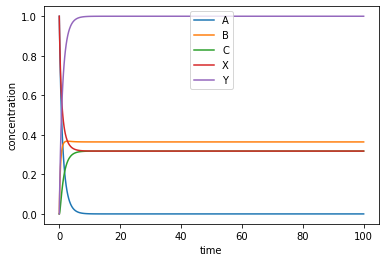

run time: 0.031s


In [4]:
chem1 = models.Chemistry()
chem1.reaction('A+X=>B+Y', k=1)
chem1.reaction('B+A=>C+Y', k=1)
chem1.initial_concentrations(A=1, X=1)
_=chem1.run()

## 2. Import experimental data
When the chemical system is defined, then experimental data can be imported.
The file is specified by pointing to the absolute path to it on a computer.

Imported file should have a `.csv` format (can be saved from Excel) and have the following structure:
    
    t   | variable1         | variable2     | ....
    -----------------------------------------------
    0   | concentration1   | concentration1 |   ...
    ... |   ....           |   .....        |   ...

The data should start on the first row and the first column of the `.csv` file.

The variable names in the top row of the file should be __exactly__ equal to the variable names specified in the model, so that the program could correlate them together.

It equally important to have first column as time of experiment and varible name should be exactly `t`.

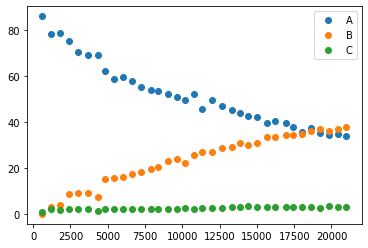

In [5]:
chem1.import_data('data/Expt1.csv')

When the file is loaded, the simulation has to be run again so that some simulation parameters are automatically adjusted:

* Times for beginning `.time_start` and end `.time_end` for the simulation are adjusted accordingly to experimental times.
* Starting concentrations for species are set to intial concentrations from experiment

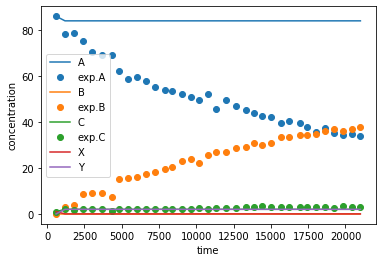

run time: 0.036s


In [6]:
chem1.run()

## 3. Manual search for optimal starting position
Before model is fitted, the parameters should be manually andjusted to find good starting position:

**Hint**: k1 = 0.02, k2 = 0.01, X = 200, Y = 100

In [10]:
@interact
def f(e = (-10,1,1),
      k1=(0,1,0.01),
      k2=(0,1,0.01),
      X=(0,200,0.1),
      Y=(0,200,0.1)):
    chem1.parameters[0] = k1*10**e
    chem1.parameters[1] = k2*10**e
    chem1.initial_concentrations(X=X, Y=Y)
    chem1.run()

interactive(children=(IntSlider(value=-5, description='e', max=1, min=-10), FloatSlider(value=0.0, description…

## 4. Fitting
This command calls the optimiser and tries to find the best possible fit:
* Fitting quality is shown with `fun` output parameter
* The optimal parameters are applied to reaction system and represented with `x` parameter of the output

If fitting takes too much time (more than 5 min), then the good idea is to terminate the process, go back to change initial parameters, and try again..
The process can be terminated with `interrupt the kernel` button on the top panel. If this causes the file to be unresponsive, then kernel can be restarted.

 final_simplex: (array([[5.51312691e-07, 2.95926918e-07],
       [5.51284813e-07, 2.95874962e-07],
       [5.51344202e-07, 2.95782582e-07]]), array([839.0903957 , 839.09041475, 839.09047508]))
           fun: 839.0903957031092
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 36
        status: 0
       success: True
             x: array([5.51312691e-07, 2.95926918e-07])


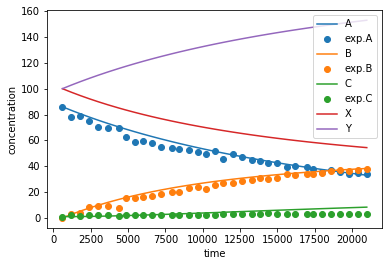

run time: 0.013s


 final_simplex: (array([[5.51312691e-07, 2.95926918e-07],
       [5.51284813e-07, 2.95874962e-07],
       [5.51344202e-07, 2.95782582e-07]]), array([839.0903957 , 839.09041475, 839.09047508]))
           fun: 839.0903957031092
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 36
        status: 0
       success: True
             x: array([5.51312691e-07, 2.95926918e-07])

In [11]:
chem1.fit()

For better visualisation, lets plot only A, B, C

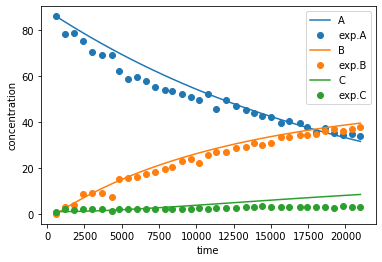

In [9]:
chem1.plot('A','B','C')